# SI 1, Flow and Lotka-Volterra models

## Flow

### Assess Identifiability

In [1]:
using StructuralIdentifiability
using DifferentialEquations

In [2]:
ode = @ODEmodel(
    x1'(t) = -a * x1(t) + b * x2(t),
    x2'(t) = -b * x2(t),
    y(t) = x1(t)
)

[ Info: Summary of the model:
[ Info: State variables: x2, x1
[ Info: Parameters: a, b
[ Info: Inputs: 
[ Info: Outputs: y


x2'(t) = -b*x2(t)
x1'(t) = -a*x1(t) + b*x2(t)
y(t) = x1(t)


In [3]:
assess_identifiability(ode)

[ Info: Assessing local identifiability
[ Info: Local identifiability assessed in 3.9745826 seconds
[ Info: Assessing global identifiability
[ Info: Computing IO-equations
┌ Info: Computed in 4.9357957 seconds
│   :ioeq_time = :ioeq_time
└   ioeq_time = 4.9357957
[ Info: Computing Wronskians
┌ Info: Computed in 1.8282882 seconds
│   :wrnsk_time = :wrnsk_time
└   wrnsk_time = 1.8282882
[ Info: Dimensions of the Wronskians [3]
┌ Info: Ranks of the Wronskians computed in 0.01711 seconds
│   :rank_time = :rank_time
└   rank_times = 0.01711
[ Info: Assessing global identifiability using the coefficients of the io-equations
┌ Info: Computed in 5.0453753 seconds
│   :check_time = :check_time
└   check_time = 5.0453753
[ Info: Global identifiability assessed in 12.0814865 seconds


Dict{Any, Symbol} with 2 entries:
  b => :locally
  a => :locally

### Simulations

Now, I check if the transformation $(x* , u* , b, a)$ does not alter the output (x)

where $$ u* = \frac{b(x*+y*)}{a} - x*
$$

In [4]:
using Plots

In [8]:
gr()

Plots.GRBackend()

In [39]:
function flow_ode(du, u, p, t)
    a = p[1]
    b = p[2]
    du[1] = - a * u[1] + b * u[2]
    du[2] = -b * u[2]
end

flow_ode (generic function with 1 method)

In [41]:
# solve the first setting ( a = 1, b = 2, x0 = 1.0, y0 = 2.0 )
u0 = [1.0, 2.0]  # Initial condition 
p = [1, 2]   # Parameter 
tspan = (0.0, 6.0) 
prob1 = ODEProblem(flow_ode, u0, tspan, p)
sol1 = solve(prob1, Tsit5())
t_values = 0.0:0.001:6.0
x1 = [sol1(t)[1] for t in t_values]
y1 = [sol1(t)[2] for t in t_values]

6001-element Vector{Float64}:
 2.0
 1.9960039972299115
 1.992015978290128
 1.9880359272586907
 1.984063828243398
 1.9800996653818048
 1.9761434228412238
 1.9721950848187242
 1.9682546355411326
 1.9643220592650323
 1.9603973402767647
 1.956480462892427
 1.952571411457874
 ⋮
 1.258944053250302e-5
 1.2564308978211628e-5
 1.2539225631034743e-5
 1.2514190372589096e-5
 1.2489203084692321e-5
 1.2464263649362917e-5
 1.2439371948820074e-5
 1.2414527865483935e-5
 1.2389731281975438e-5
 1.2364982081116303e-5
 1.2340280145929197e-5
 1.2315625359637527e-5

In [42]:
# solve the second setting ( a = 2, b = 1, x0 = 1.0, y0 = 5.0 )
u0 = [1.0, 5.0]  # Initial condition 
p = [2, 1]   # Parameter 
tspan = (0.0, 6.0) 
prob2 = ODEProblem(flow_ode, u0, tspan, p)
sol2 = solve(prob2, Tsit5())
t_values = 0.0:0.001:6.0
x2 = [sol2(t)[1] for t in t_values]
y2 = [sol2(t)[2] for t in t_values]

6001-element Vector{Float64}:
 5.0
 4.9950024991588675
 4.990009993306283
 4.985022477452087
 4.9800399466109395
 4.975062395802328
 4.9700898200505605
 4.9651222143847695
 4.9601595738389115
 4.955201893451765
 4.950249168266933
 4.945301393332842
 4.940358563702741
 ⋮
 0.012532079013704494
 0.012519553335185377
 0.012507040162983844
 0.012494539484613607
 0.012482051287603064
 0.012469575559495507
 0.012457112287848812
 0.012444661460235573
 0.012432223064243218
 0.01241979708747374
 0.012407383517543958
 0.012394982342085411

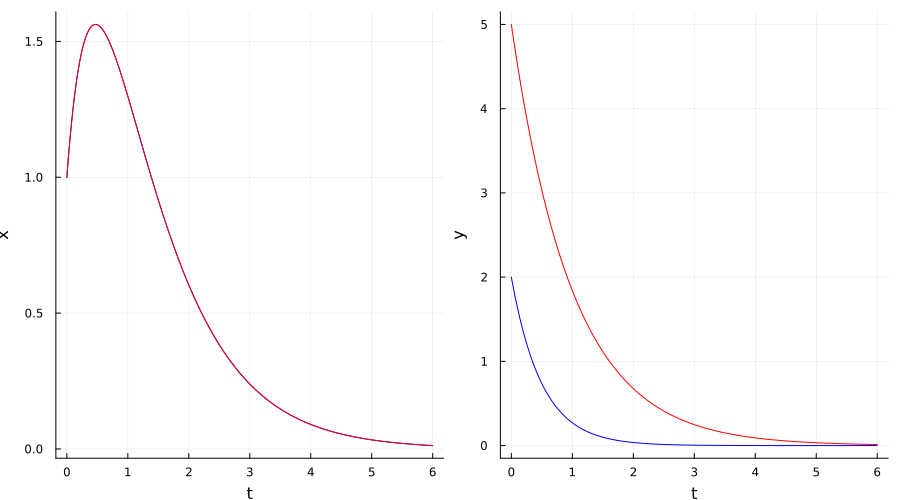

In [57]:
px1 = plot(t_values, x1, xlabel="t", ylabel="x", color = "blue")
plot!(t_values, x2, xlabel="t", ylabel="x", color = "red")
py1 = plot(t_values, y1, xlabel="t", ylabel="y", color = "blue")
plot!(t_values, y2, xlabel="t", ylabel="y", color = "red")
plot(px1, py1, layout = (1,2), legend = false, size=(900, 500))

Let's do another simulation with others parameters

In [60]:
# solve the first setting ( a = 5, b = 8, x0 = 0.0,  y0 = 7.0 )
u0 = [0.0, 7.0]  # Initial condition 
p = [5, 8]   # Parameter 
tspan = (0.0, 6.0) 
prob1 = ODEProblem(flow_ode, u0, tspan, p)
sol1 = solve(prob1, Tsit5())
t_values = 0.0:0.001:6.0
x1 = [sol1(t)[1] for t in t_values]
y1 = [sol1(t)[2] for t in t_values]
1

1

In [61]:
# solve the second setting ( a = 8, b = 5, x0 = 0.0,  y0 = (8/5)*7  )
u0 = [0.0, (8*7.0/5)]  # Initial condition 
p = [8, 5]   # Parameter 
tspan = (0.0, 6.0) 
prob2 = ODEProblem(flow_ode, u0, tspan, p)
sol2 = solve(prob2, Tsit5())
t_values = 0.0:0.001:6.0
x2 = [sol2(t)[1] for t in t_values]
y2 = [sol2(t)[2] for t in t_values]
1

1

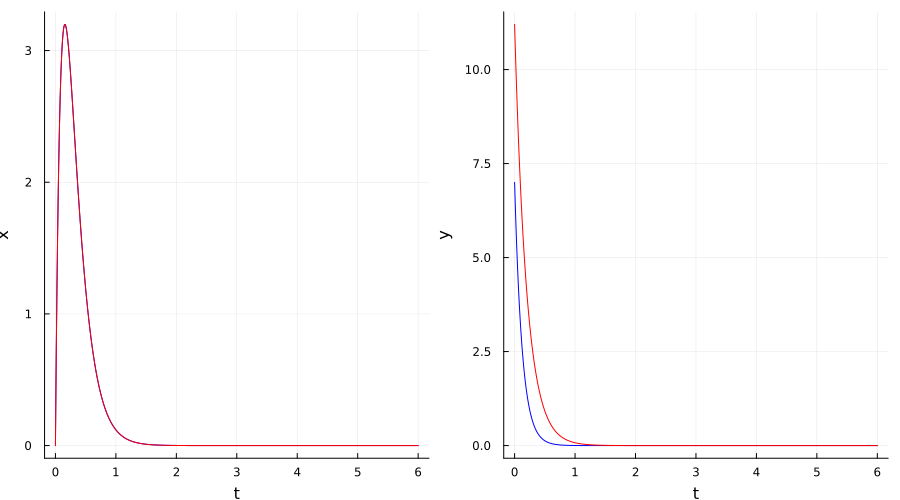

In [62]:
px1 = plot(t_values, x1, xlabel="t", ylabel="x", color = "blue")
plot!(t_values, x2, xlabel="t", ylabel="x", color = "red")
py1 = plot(t_values, y1, xlabel="t", ylabel="y", color = "blue")
plot!(t_values, y2, xlabel="t", ylabel="y", color = "red")
plot(px1, py1, layout = (1,2), legend = false, size=(900, 500))

In [ ]:
and indeed also here they are the same

## Lotka-Volterra

### Assess Identifiability

In [111]:
ode_LV = @ODEmodel(
    x1'(t) = a * x1(t) - b * x1(t) * x2(t),
    x2'(t) = -c * x2(t) + d * x1(t) * x2(t),
    y(t) = x1(t)
)

[ Info: Summary of the model:
[ Info: State variables: x2, x1
[ Info: Parameters: a, b, d, c
[ Info: Inputs: 
[ Info: Outputs: y


x1'(t) = a*x1(t) - b*x2(t)*x1(t)
x2'(t) = d*x2(t)*x1(t) - x2(t)*c
y(t) = x1(t)


In [112]:
assess_identifiability(ode_LV)

[ Info: Assessing local identifiability
[ Info: Local identifiability assessed in 0.1224584 seconds
[ Info: Assessing global identifiability
[ Info: Computing IO-equations
┌ Info: Computed in 0.9682895 seconds
│   :ioeq_time = :ioeq_time
└   ioeq_time = 0.9682895
[ Info: Computing Wronskians
┌ Info: Computed in 0.5140526 seconds
│   :wrnsk_time = :wrnsk_time
└   wrnsk_time = 0.5140526
[ Info: Dimensions of the Wronskians [5]
┌ Info: Ranks of the Wronskians computed in 0.000111 seconds
│   :rank_time = :rank_time
└   rank_times = 0.000111
[ Info: Assessing global identifiability using the coefficients of the io-equations
┌ Info: Computed in 0.0694735 seconds
│   :check_time = :check_time
└   check_time = 0.0694735
[ Info: Global identifiability assessed in 1.5553428 seconds


Dict{Any, Symbol} with 4 entries:
  a => :globally
  c => :globally
  b => :nonidentifiable
  d => :globally

as discussed today